In [138]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import IPython.display

In [139]:
# has to be set in order to show the image in notebook
%matplotlib inline 

In [171]:
y, sr = librosa.load("/Users/muddCS15/Documents/RealDrums/and-kick-snare.wav")
# returns a numpy array series => assigned to y
#   and the sampling rate of y => assigned to sr (signal rate)

In [172]:
IPython.display.Audio(data=y, rate=sr) # Preview Audio in notebook

In [189]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

In [190]:
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

Estimated tempo: 117.45 beats per minute


In [191]:
# Save the frames to CSV
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

<matplotlib.colorbar.Colorbar instance at 0x1171beea8>

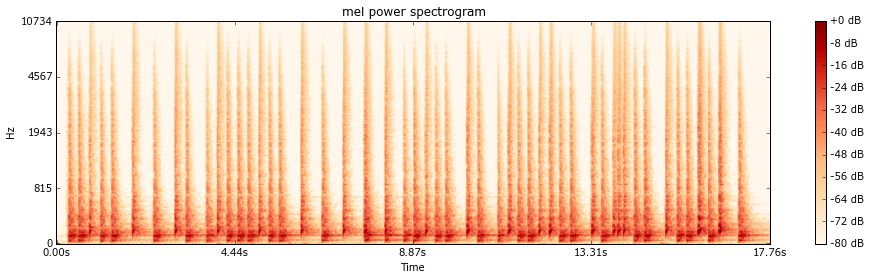

In [192]:
# Extract Mel Spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=256) 

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.logamplitude(S, ref_power=np.max)

plt.figure(figsize=(16,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram')
plt.colorbar(format='%+02.0f dB')

In [193]:
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)

In [194]:
onset_times  = librosa.frames_to_time(onset_frames, sr=sr)
print  "There are %d onsets" % len(onset_times) 
print onset_times
o_env = librosa.onset.onset_strength(y, sr=sr)

There are 52 onsets
[  0.30185941   0.34829932   0.58049887   0.83591837   1.13777778
   1.39319728   1.90403628   2.43809524   2.9721542    3.25079365
   3.76163265   4.01705215   4.27247166   4.55111111   4.80653061
   5.06195011   5.31736961   5.57278912   6.10684807   6.64090703
   7.15174603   7.68580499   8.19664399   8.66104308   8.93968254
   9.19510204   9.45052154   9.70594104  10.24        10.51863946
  11.0062585   11.261678    11.51709751  11.77251701  12.02793651
  12.28335601  12.53877551  12.81741497  13.32825397  13.58367347
  13.88553288  14.02485261  14.14095238  14.39637188  14.65179138
  15.18585034  15.4644898   15.69668934  15.99854875  16.25396825
  16.50938776  16.9970068 ]


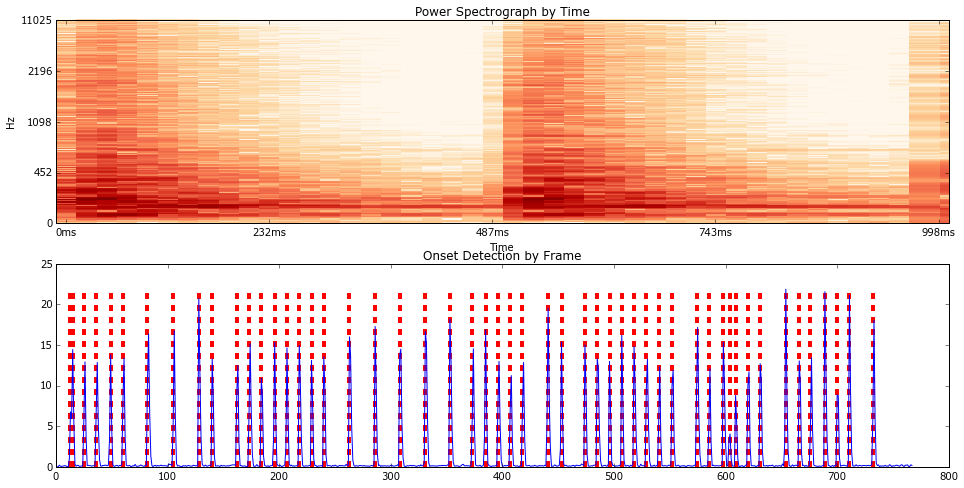

In [195]:
D = np.abs(librosa.stft(y2))**2
plt.figure(figsize=(16,8)) 

plt.subplot(2, 1, 1)
plt.title('Power Spectrograph by Time')
librosa.display.specshow(librosa.logamplitude(D, ref_power=np.max), x_axis='time', y_axis='log')

plt.subplot(2, 1, 2)
plt.title('Onset Detection by Frame')
plt.plot(o_env, label="Onset strength")
plt.vlines(onset_frames, 0, o_env.max(), color='r', linewidth=4.00, linestyles="--")